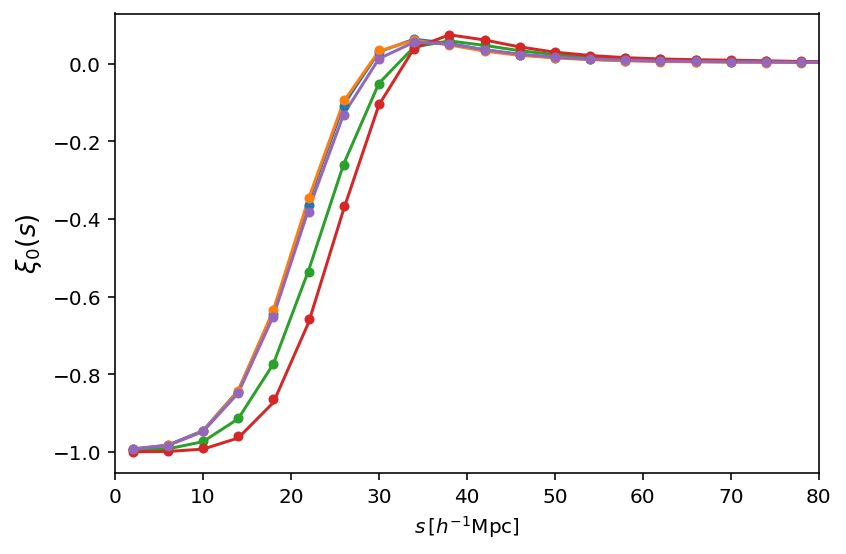

In [5]:
from sunbird.summaries import VoxelVoids
from sunbird.data.data_readers import Abacus
from sunbird.covariance import CovarianceMatrix
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline
%config InlineBackend.figure_format = 'retina'



emulator = VoxelVoids()
s = emulator.coordinates['s']

ell = 0
select_filters = {
    'multipoles': [ell]
}
slice_filters = {
    's': [0, 150]
}
spow = 0

fig, ax = plt.subplots()
colors = ['C0', 'C1', 'C2', 'C3', 'C4']

data_class = Abacus(
    dataset='voidprior',
    statistics=['voxel_voids'],
    select_filters=select_filters,
    slice_filters=slice_filters,
)

for i, cosmo in enumerate([0, 1, 3, 4, 13]):
    observation = data_class.get_observation(cosmology=cosmo, hod_idx=80)

    cov = CovarianceMatrix(
        dataset='voidprior',
        covariance_data_class='AbacusSmall',
        statistics=['voxel_voids'],
        select_filters=select_filters,
        slice_filters=slice_filters,
        path_to_models='/global/homes/e/epaillas/pscratch/sunbird/trained_models/best/'
    )
    cov_data = cov.get_covariance_data(volume_scaling=64)
    # cov_emu = cov.get_covariance_emulator()
    # cov_sim = cov.get_covariance_simulation()
    error_data = np.sqrt(np.diag(cov_data))

    parameters = data_class.get_parameters_for_observation(cosmology=cosmo, hod_idx=80)
    prediction, error = emulator(
        param_dict=parameters,
        select_filters=select_filters,
        slice_filters=slice_filters,
    )
    prediction = prediction.numpy()

    ax.errorbar(s, s**spow*observation, s**spow*error_data, label='Abacus', color=colors[i], ls='', marker='o', ms=4.0)
    ax.plot(s, s**spow*prediction, label='Emulator', color=colors[i])
ax.set_xlim(0, 80)


if spow == 2:
    ax.set_ylabel(rf'$s^2\xi_{ell}(s)\,[h^{{-2}}{{\rm Mpc}}^2]$', fontsize=13)
else:
    ax.set_ylabel(rf'$\xi_{ell}(s)$', fontsize=13)
    # ax[0].set_xlim(0, 80)
ax.set_xlabel(r'$s\,[h^{-1}{\rm Mpc}]$')
plt.tight_layout()
plt.show()
    # plt.subplots_adjust(hspace=0.0)
    # # plt.savefig(f'fig/parameter_dependence_density_split_cross_{param_name}_nos2.pdf', bbox_inches='tight')

    # plt.show()



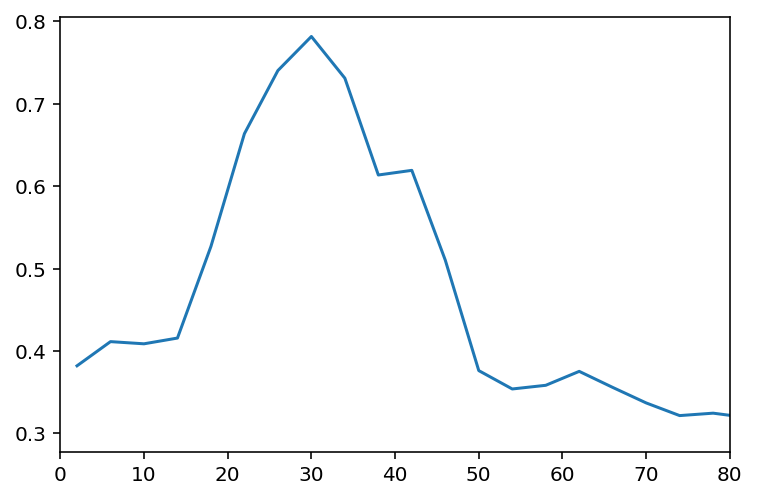

In [10]:
from sunbird.summaries import VoxelVoids
from sunbird.data.data_readers import Abacus
from sunbird.covariance import CovarianceMatrix
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline
%config InlineBackend.figure_format = 'retina'



emulator = VoxelVoids()
s = emulator.coordinates['s']

ell = 2
select_filters = {
    'multipoles': [ell]
}
slice_filters = {
    's': [0, 150]
}
spow = 0

fig, ax = plt.subplots()
colors = ['C0', 'C1', 'C2', 'C3']

emulator = VoxelVoids(dataset='voidprior', path_to_models='/global/homes/e/epaillas/pscratch/sunbird/trained_models/best/')

cov = CovarianceMatrix(
    emulators={'voxel_voids': emulator},
    dataset='voidprior',
    covariance_data_class='AbacusSmall',
    statistics=['voxel_voids'],
    select_filters=select_filters,
    slice_filters=slice_filters,
    path_to_models='/global/homes/e/epaillas/pscratch/sunbird/trained_models/best/'
)
cov_data = cov.get_covariance_data(volume_scaling=8)
cov_emu = cov.get_covariance_emulator(fractional=False)
cov_sim = cov.get_covariance_simulation()
# cov_emu = cov.get_covariance_emulator()
# cov_sim = cov.get_covariance_simulation()
cov_tot = cov_data + cov_emu + cov_sim
error_data = np.sqrt(np.diag(cov_data))
error_emu = np.sqrt(np.diag(cov_emu))
# error_tot = np.sqrt(np.diag(cov_tot))

ax.plot(s, error_emu/error_data)
ax.set_xlim(0, 80)


# if spow == 2:
#     ax.set_ylabel(rf'$s^2\xi_{2}(s)\,[h^{{-2}}{{\rm Mpc}}^2]$', fontsize=13)
# else:
#     ax.set_ylabel(rf'$\xi_{2}(s)$', fontsize=13)
#     # ax[0].set_xlim(0, 80)
# ax.set_xlabel(r'$s\,[h^{-1}{\rm Mpc}]$')
# plt.tight_layout()
plt.show()
    # plt.subplots_adjust(hspace=0.0)
    # # plt.savefig(f'fig/parameter_dependence_density_split_cross_{param_name}_nos2.pdf', bbox_inches='tight')

    # plt.show()
